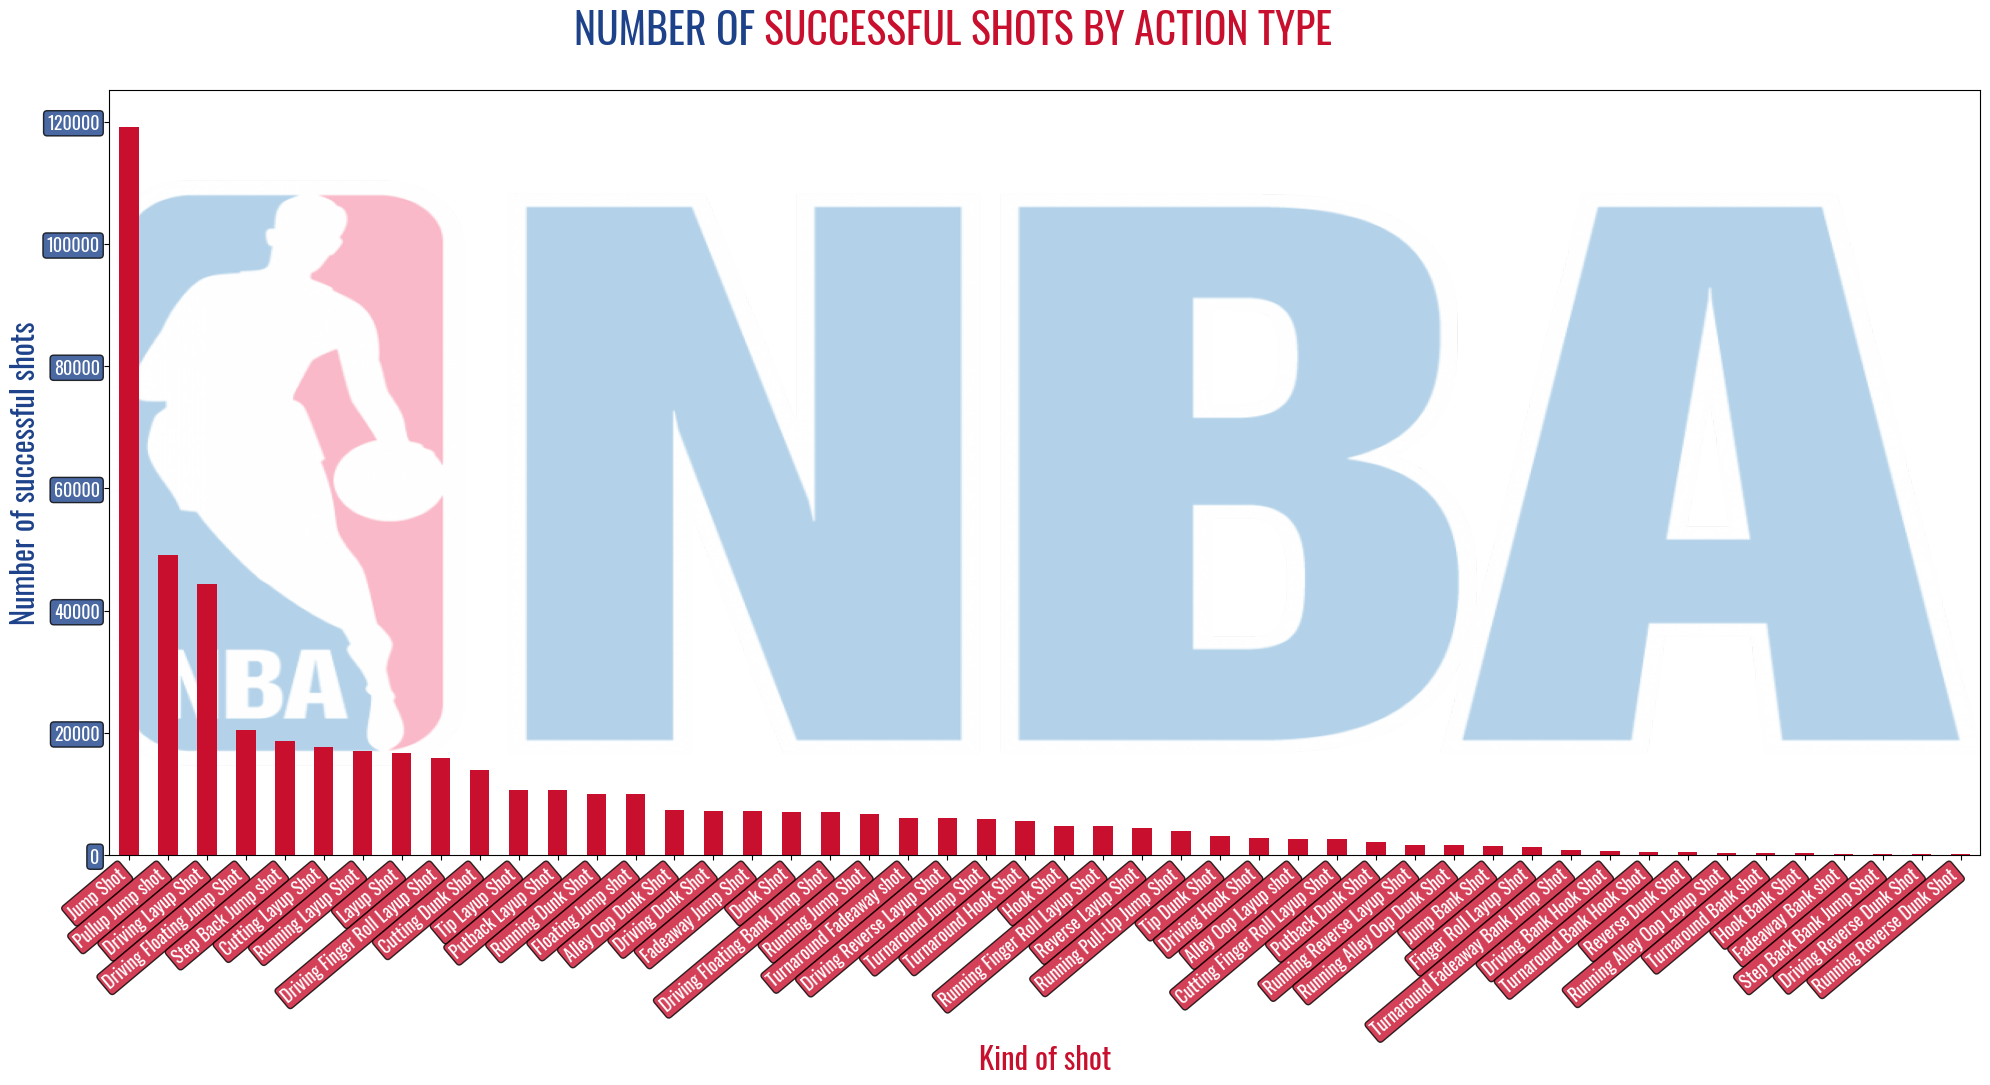

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.font_manager as fm

# Leer datos
df = pd.read_csv('DB-NBA-cleaned.csv')

# Agrupar y ordenar los datos
aciertos_por_tiro = df.groupby('ACTION_TYPE')['SHOT_MADE'].sum().sort_values(ascending=False)

# Ruta a la fuente Oswald Bold
font_path = '/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Cargar imagen de fondo
img = Image.open('/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png')
img_array = np.array(img)

# Crear figura
fig, ax = plt.subplots(figsize=(20, 11))

# Gráfico de barras
aciertos_por_tiro.plot(kind='bar', color='#C8102E', ax=ax)

# Imagen de fondo
ax.imshow(
    img_array,
    extent=[-0.5, len(aciertos_por_tiro)-0.5, 0, ax.get_ylim()[1]],
    aspect='auto',
    alpha=0.3,
    zorder=0
)

# Título en dos colores
ax.text(0.35, 1.05, "NUMBER OF ", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=30, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.35, 1.05, "SUCCESSFUL SHOTS BY ACTION TYPE", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=30, color='#C8102E',
        ha='left', va='bottom')

# Ejes y etiquetas
ax.set_xlabel("Kind of shot", fontproperties=font_prop, fontsize=22, color='#C8102E')
ax.set_ylabel("Number of successful shots", fontproperties=font_prop, fontsize=22, color='#1D428A')

# Estilo etiquetas eje X
for label in ax.get_xticklabels():
    label.set_fontproperties(font_prop)
    label.set_fontsize(13)
    label.set_rotation(40)
    label.set_ha('right')
    label.set_color("white")
    label.set_bbox(dict(
        facecolor='#C8102E',
        edgecolor='black',
        boxstyle='round,pad=0.2',
        alpha=0.8
    ))

# Estilo etiquetas eje Y
for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)
    label.set_fontsize(13)
    label.set_color("white")
    label.set_bbox(dict(
        facecolor='#1D428A',
        edgecolor='black',
        boxstyle='round,pad=0.2',
        alpha=0.8
    ))

plt.tight_layout()
plt.show()




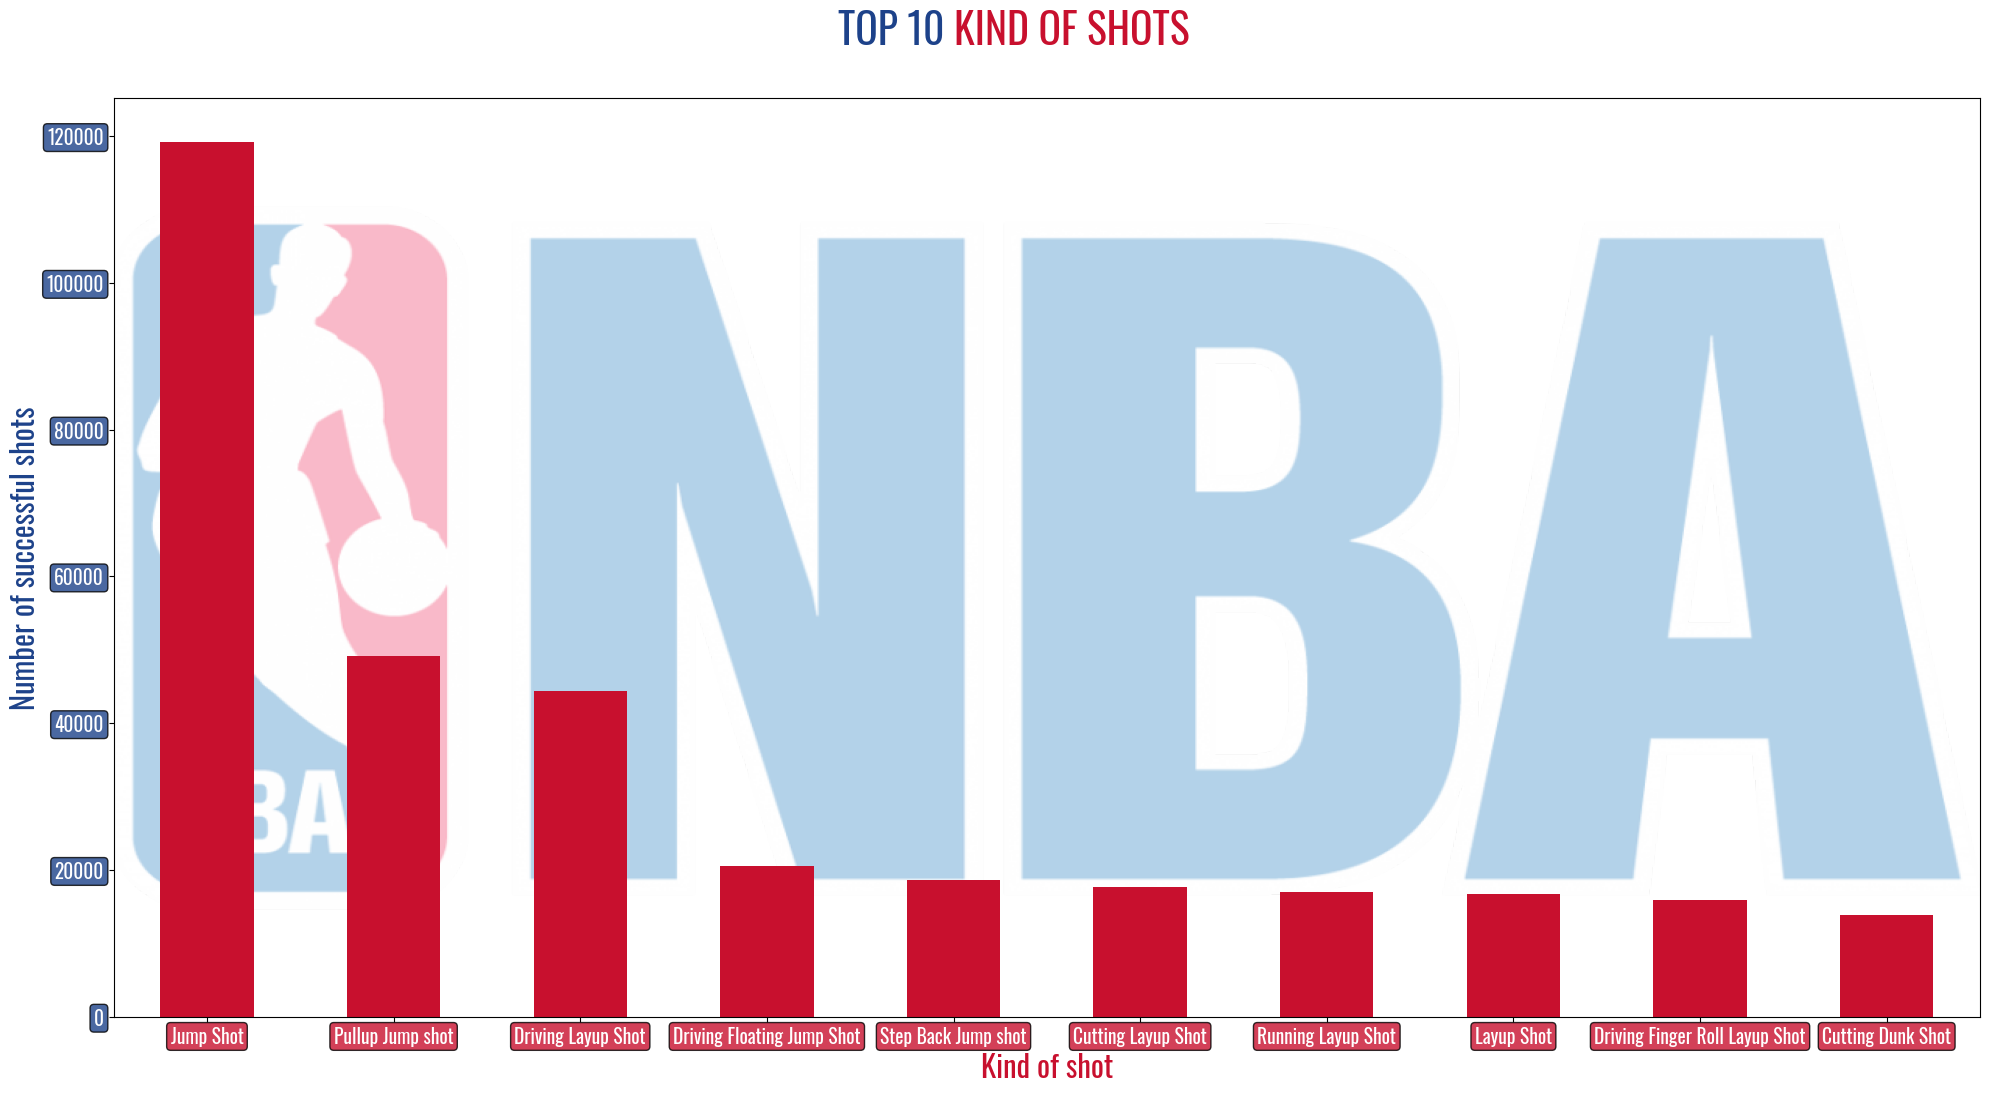

In [112]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.font_manager as fm

font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

fig, ax = plt.subplots(figsize=(20, 11))


df[df["SHOT_MADE"] == 1] \
    .groupby("ACTION_TYPE")["SHOT_MADE"] \
    .count() \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar', color='#C8102E', ax=ax)

ax.imshow(
    img_array,
    extent=[-0.5, 9.5, 0, ax.get_ylim()[1]],
    alpha=0.3,
    aspect='auto',
    zorder=0
)

ax.text(0.45, 1.05, "TOP 10 ", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=30, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.45, 1.05, "KIND OF SHOTS", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=30, color='#C8102E',
        ha='left', va='bottom')

ax.set_xlabel("Kind of shot", fontproperties=font_prop, fontsize=22, color='#C8102E')
ax.set_ylabel("Number of successful shots", fontproperties=font_prop, fontsize=22, color='#1D428A')

for label in ax.get_xticklabels():
    label.set_fontproperties(font_prop)
    label.set_fontsize(14)
    label.set_rotation(0)
    label.set_color("white")
    label.set_bbox(dict(
        facecolor='#C8102E',
        edgecolor='black',
        boxstyle='round,pad=0.2',
        alpha=0.8
    ))

for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)
    label.set_fontsize(14)
    label.set_color("white")
    label.set_bbox(dict(
        facecolor='#1D428A',
        edgecolor='black',
        boxstyle='round,pad=0.2',
        alpha=0.8
    ))

plt.tight_layout()
plt.show()

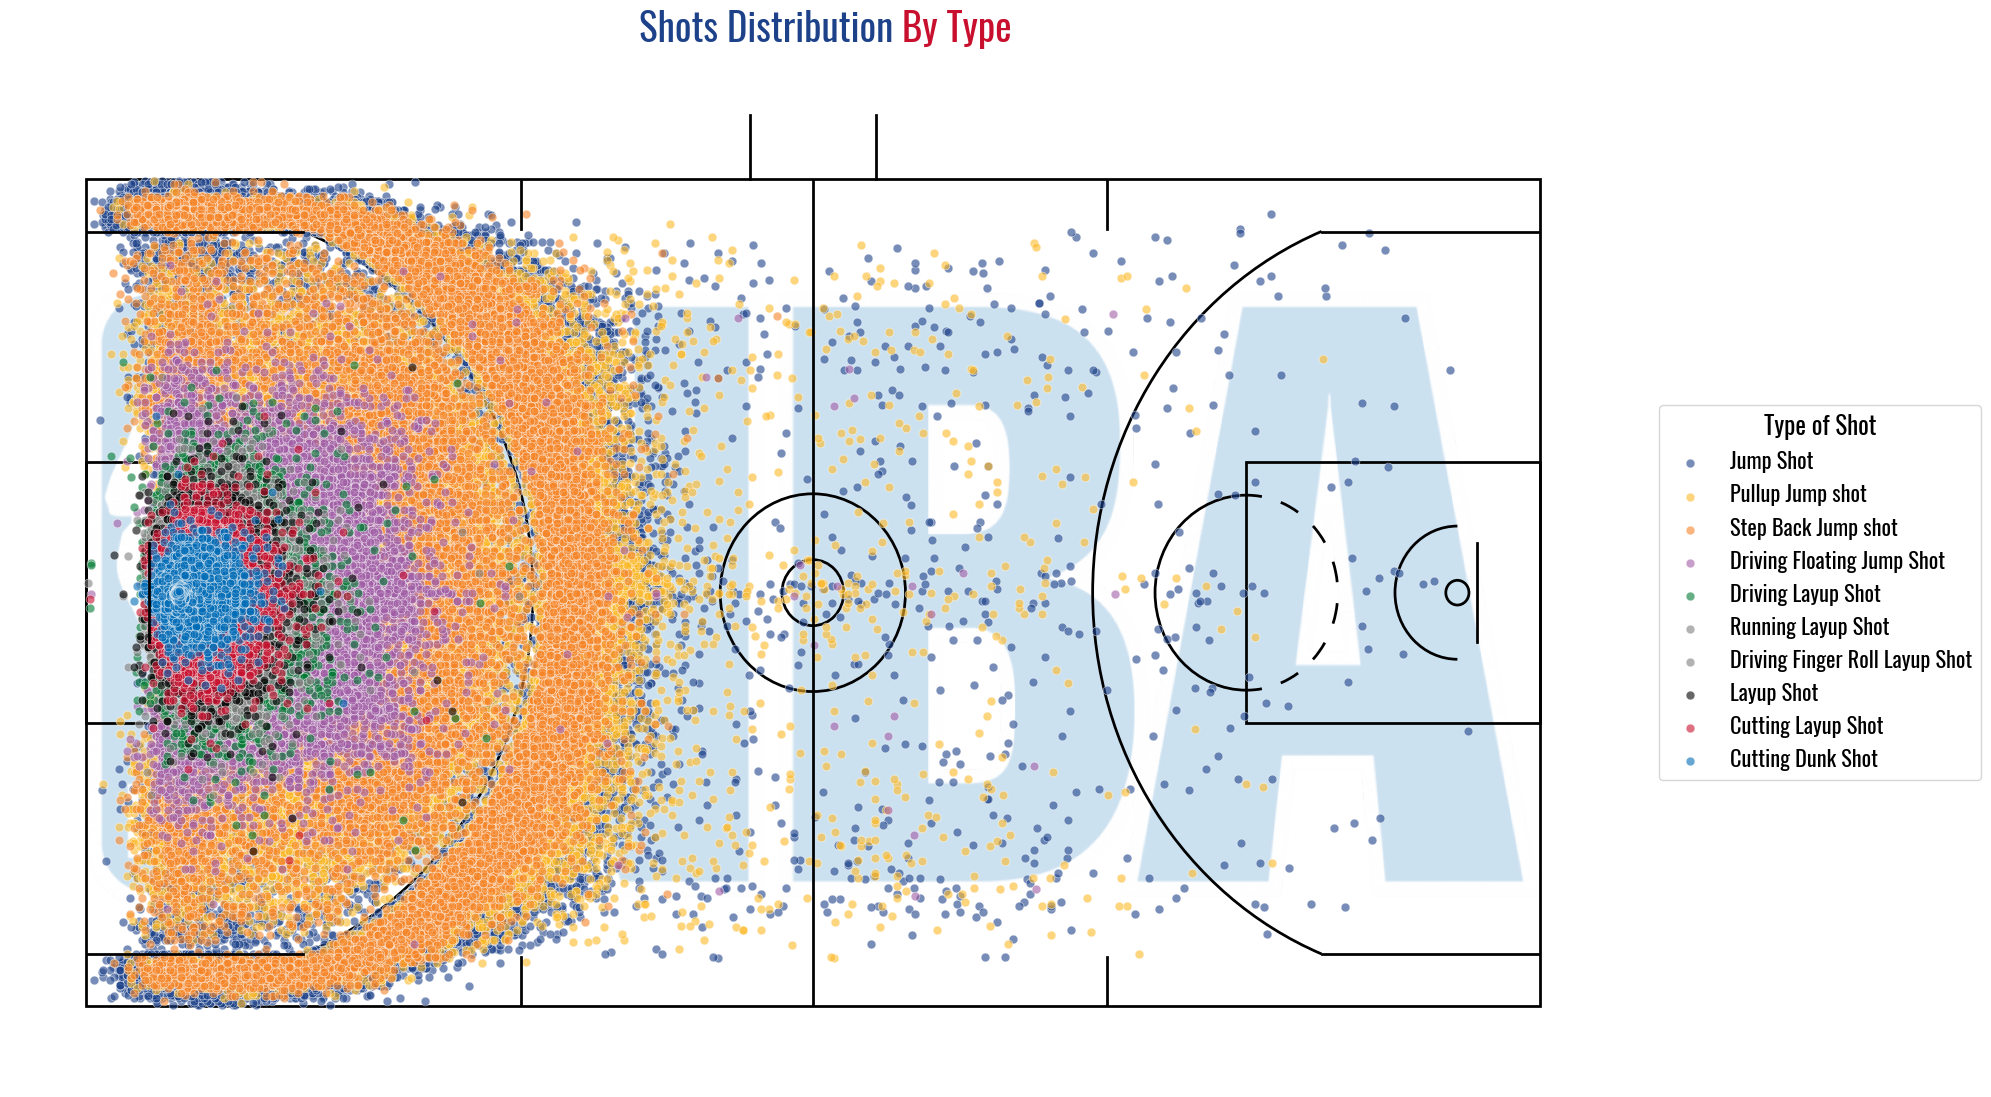

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# --- Configurar fuente personalizada ---
font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Cargar imagen de fondo (marca de agua) ---
img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

# --- Diccionario de colores por tipo de tiro ---
colores_por_tipo = {
    "Jump Shot": "#1D428A",                   # Azul (NBA / 76ers)
    "Pullup Jump shot": "#FDB927",            # Amarillo (Lakers)
    "Step Back Jump shot": "#F58426",         # Naranja (Knicks)
    "Driving Floating Jump Shot": "#A05DA5",  # Púrpura (Kings)
    "Running Layup shot": "#B8C4CA",          # Azul claro (Mavs)
    "Driving Finger Roll Layup shot": "#C4CED4",  # Gris (Spurs)
    "Layup Shot": "#000000",                  # Negro (Nets)
    "Driving Layup Shot": "#007A33",          # Verde (Celtics)
    "Cutting Layup Shot": "#C8102E",          # Rojo (Bulls)
    "Cutting Dunk Shot": "#006BB6"            # Azul fuerte (Pistons)
}


# --- Filtrar los datos por tipo de tiro ---
tipos_tiro = [
    "Jump Shot", 
    "Pullup Jump shot",
    "Step Back Jump shot",
    "Driving Floating Jump Shot", 
    "Driving Layup Shot", 
    "Running Layup Shot",
    "Driving Finger Roll Layup Shot",
    "Layup Shot",
     
    "Cutting Layup Shot",
    "Cutting Dunk Shot"
]
df_filtrado = df[df["ACTION_TYPE"].isin(tipos_tiro)].copy()

# --- Ajustar coordenadas si es necesario ---
df_filtrado.loc[:, "LOC_Y"] = df_filtrado["LOC_Y"] - 47

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(20, 11))

# --- Dibujar la cancha ---
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax)

# --- Insertar imagen de fondo como marca de agua ---
ax.imshow(
    img_array,
    extent=[-47, 47, -25, 25],
    alpha=0.2,
    aspect='auto',
    zorder=0
)

# --- Dibujar tiros ---
for tipo in tipos_tiro:
    tiros_tipo = df_filtrado[df_filtrado["ACTION_TYPE"] == tipo]
    ax.scatter(
        tiros_tipo["LOC_Y"], tiros_tipo["LOC_X"],
        label=tipo,
        alpha=0.6,
        s=40,
        edgecolors="white",
        linewidth=0.5,

        color=colores_por_tipo.get(tipo, "gray")  # Color asignado
    )

# --- Título dividido en dos colores ---
ax.text(0.55, 1.05, "Shots Distribution", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.55, 1.05, " By Type", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#C8102E',
        ha='left', va='bottom')

# --- Leyenda centrada verticalmente al lado derecho y agrandada ---
legend = ax.legend(
    title="Type of Shot",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=16
)
plt.setp(legend.get_title(), fontproperties=font_prop, fontsize=18)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)
    text.set_fontsize(16)

# --- Quitar ejes y ajustar diseño ---
ax.axis("off")
plt.tight_layout()
plt.show()



# ***Layup Shots Plots***

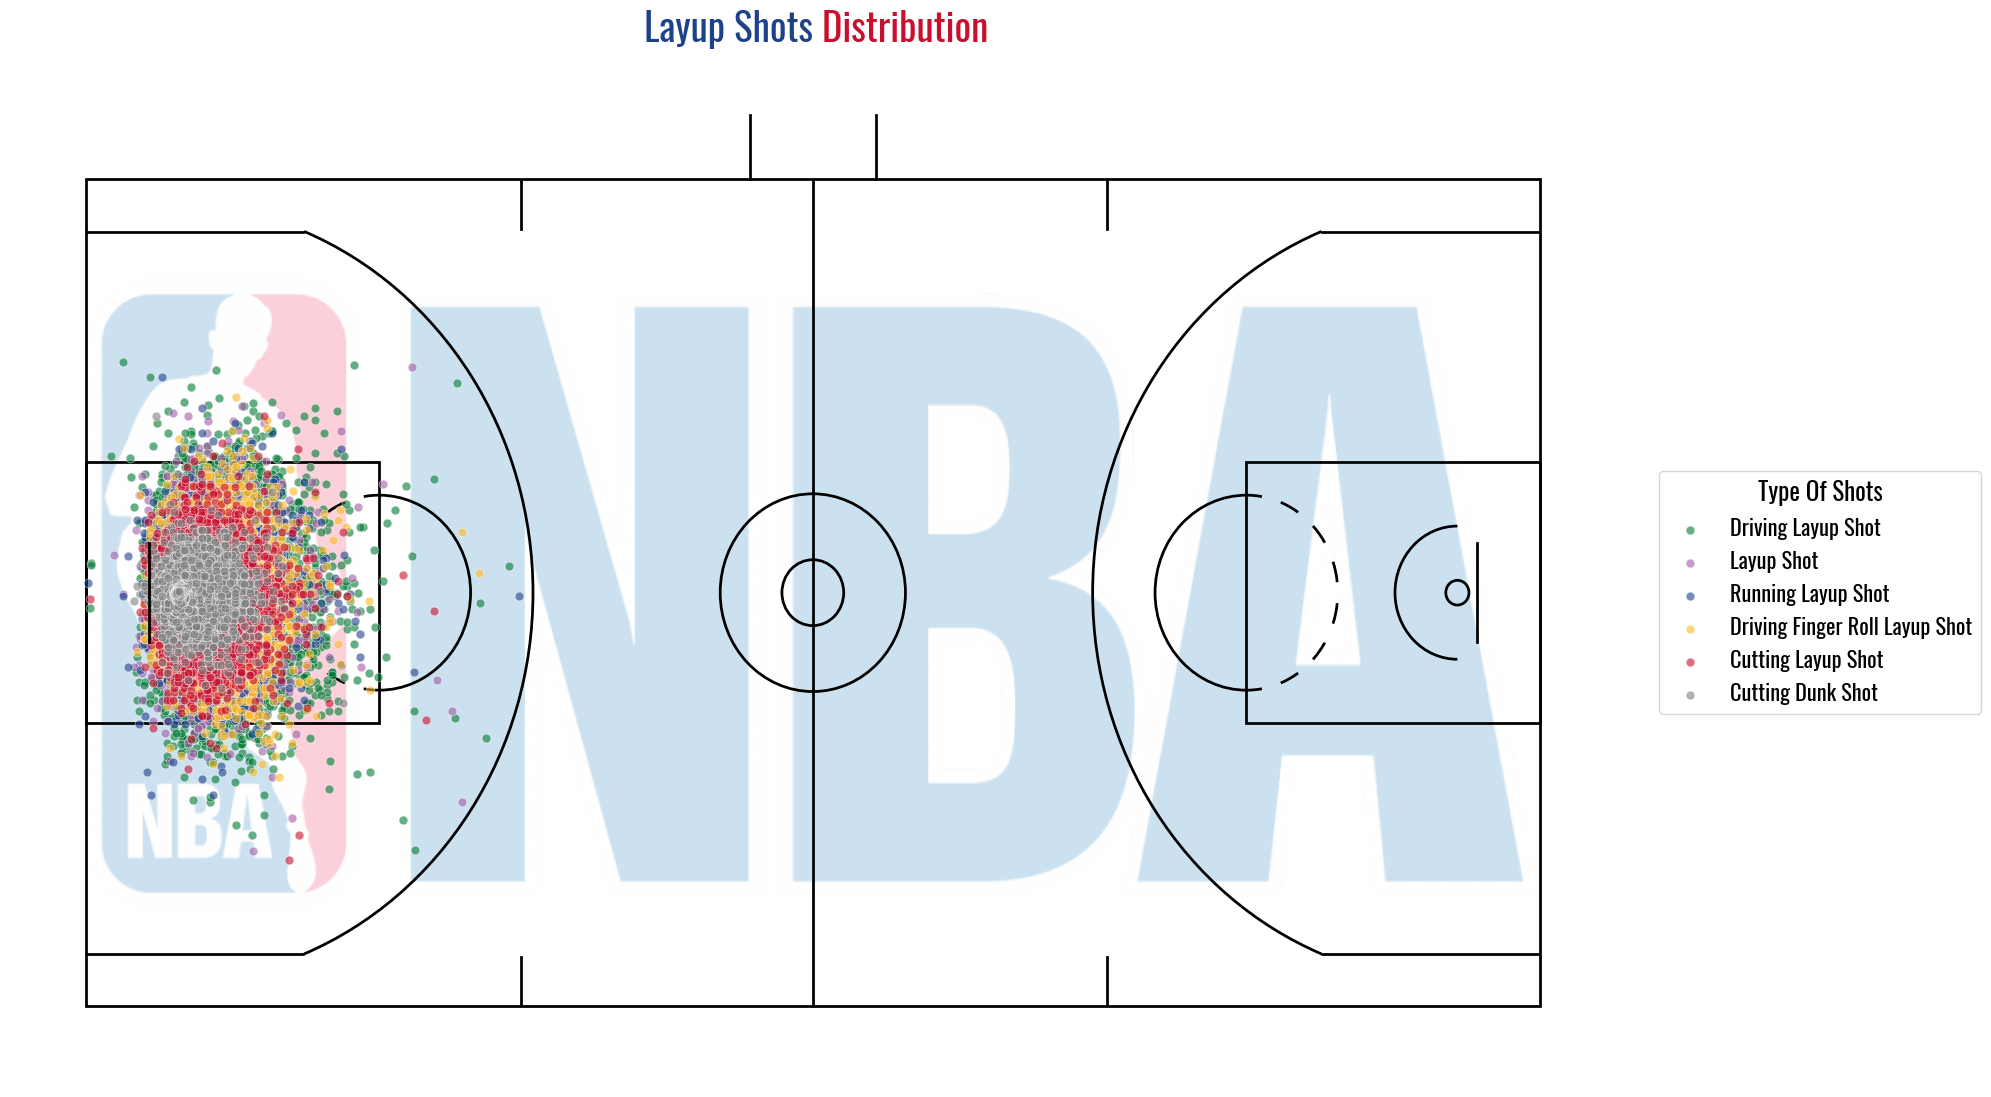

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# --- Configurar fuente personalizada ---
font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Cargar imagen de fondo (marca de agua) ---
img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

# --- Diccionario de colores por tipo de tiro ---
colores_por_tipo = {
    "Running Layup Shot": "#1D428A",  # azul
    "Driving Finger Roll Layup Shot": "#FDB927",  # amarillo
    "Layup Shot": "#A05DA5",  # púrpura
    "Driving Layup Shot": "#007A33",  # verde
    "Cutting Layup Shot": "#C8102E",  # rojo
}

# --- Filtrar los datos por tipo de tiro ---
tipos_tiro = [
    "Driving Layup Shot", 
    "Layup Shot",
    "Running Layup Shot",
    "Driving Finger Roll Layup Shot",
    "Cutting Layup Shot",
    "Cutting Dunk Shot"
    
    
    

]
df_filtrado = df[df["ACTION_TYPE"].isin(tipos_tiro)].copy()

# --- Ajustar coordenadas si es necesario ---
df_filtrado.loc[:, "LOC_Y"] = df_filtrado["LOC_Y"] - 47

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(20, 11))

# --- Dibujar la cancha ---
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax)

# --- Insertar imagen de fondo como marca de agua ---
ax.imshow(
    img_array,
    extent=[-47, 47, -25, 25],
    alpha=0.2,
    aspect='auto',
    zorder=0
)

# --- Dibujar tiros ---
for tipo in tipos_tiro:
    tiros_tipo = df_filtrado[df_filtrado["ACTION_TYPE"] == tipo]
    ax.scatter(
        tiros_tipo["LOC_Y"], tiros_tipo["LOC_X"],
        label=tipo,
        alpha=0.6,
        s=40,
        edgecolors="white",
        linewidth=0.5,

        color=colores_por_tipo.get(tipo, "gray")  # Color asignado
    )

# --- Título dividido en dos colores ---
ax.text(0.5, 1.05, "Layup Shots", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.5, 1.05, " Distribution", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#C8102E',
        ha='left', va='bottom')

# --- Leyenda centrada verticalmente al lado derecho y agrandada ---
legend = ax.legend(
    title="Type Of Shots",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=16
)
plt.setp(legend.get_title(), fontproperties=font_prop, fontsize=18)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)
    text.set_fontsize(16)

# --- Quitar ejes y ajustar diseño ---
ax.axis("off")
plt.tight_layout()
plt.show()

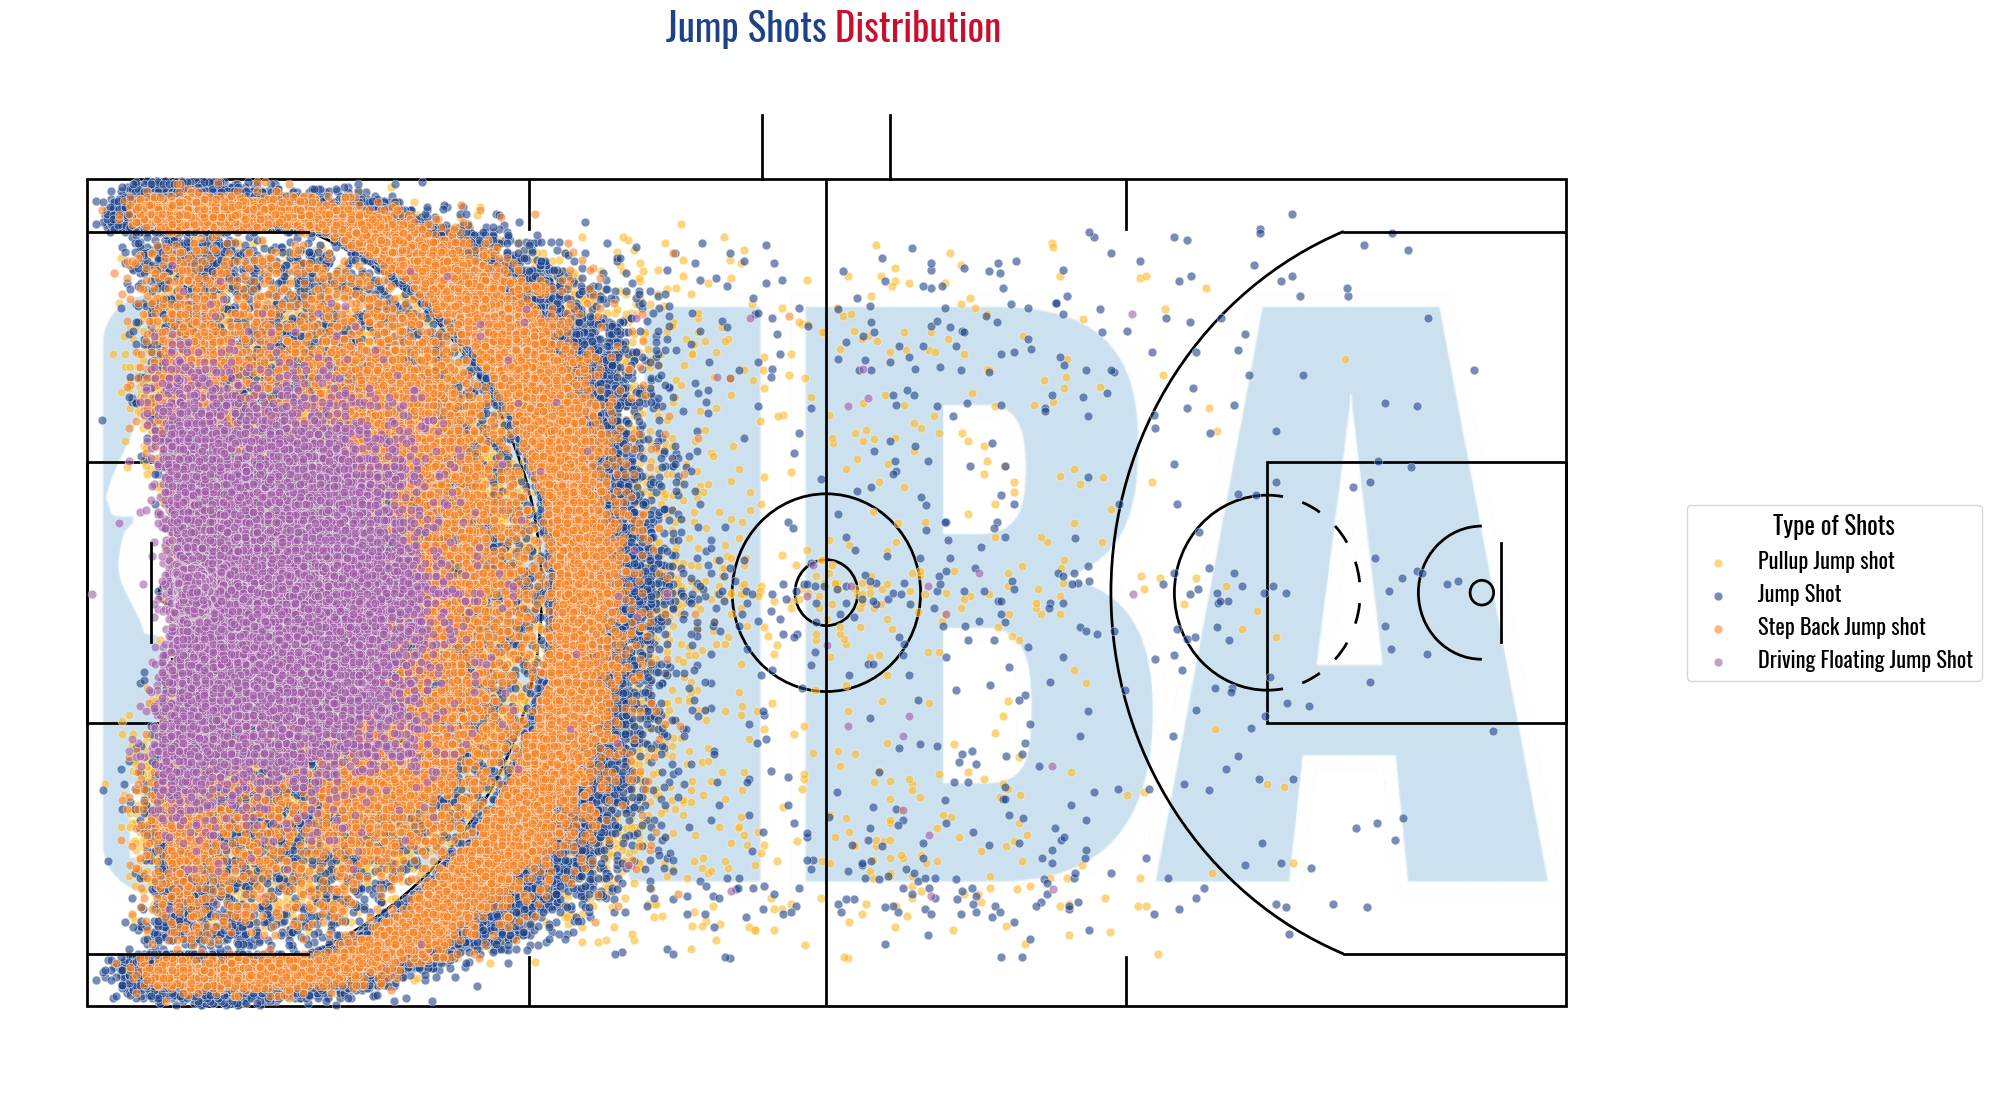

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# --- Configurar fuente personalizada ---
font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Cargar imagen de fondo (marca de agua) ---
img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

# --- Diccionario de colores por tipo de tiro ---
colores_por_tipo = {
    "Jump Shot": "#1D428A",                   # Azul (NBA / 76ers)
    "Pullup Jump shot": "#FDB927",            # Amarillo (Lakers)
    "Step Back Jump shot": "#F58426",         # Naranja (Knicks)
    "Driving Floating Jump Shot": "#A05DA5",  # Púrpura (Kings)
    "Running Layup shot": "#B8C4CA",          # Azul claro (Mavs)
    "Driving Finger Roll Layup shot": "#C4CED4",  # Gris (Spurs)
    "Layup Shot": "#000000",                  # Negro (Nets)
    "Driving Layup Shot": "#007A33",          # Verde (Celtics)
    "Cutting Layup Shot": "#C8102E",          # Rojo (Bulls)
    "Cutting Dunk Shot": "#006BB6"            # Azul fuerte (Pistons)
}


# --- Filtrar los datos por tipo de tiro ---
tipos_tiro = [
    "Pullup Jump shot",
    "Jump Shot", 
    "Step Back Jump shot",
    "Driving Floating Jump Shot"

]
df_filtrado = df[df["ACTION_TYPE"].isin(tipos_tiro)].copy()

# --- Ajustar coordenadas si es necesario ---
df_filtrado.loc[:, "LOC_Y"] = df_filtrado["LOC_Y"] - 47

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(20, 11))

# --- Dibujar la cancha ---
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax)

# --- Insertar imagen de fondo como marca de agua ---
ax.imshow(
    img_array,
    extent=[-47, 47, -25, 25],
    alpha=0.2,
    aspect='auto',
    zorder=0
)

# --- Dibujar tiros ---
for tipo in tipos_tiro:
    tiros_tipo = df_filtrado[df_filtrado["ACTION_TYPE"] == tipo]
    ax.scatter(
        tiros_tipo["LOC_Y"], tiros_tipo["LOC_X"],
        label=tipo,
        alpha=0.6,
        s=40,
        edgecolors="white",
        linewidth=0.5,

        color=colores_por_tipo.get(tipo, "gray")  # Color asignado
    )

# --- Título dividido en dos colores ---
ax.text(0.5, 1.05, "Jump Shots", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.5, 1.05, " Distribution", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#C8102E',
        ha='left', va='bottom')

# --- Leyenda centrada verticalmente al lado derecho y agrandada ---
legend = ax.legend(
    title="Type of Shots",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=16
)
plt.setp(legend.get_title(), fontproperties=font_prop, fontsize=18)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)
    text.set_fontsize(16)

# --- Quitar ejes y ajustar diseño ---
ax.axis("off")
plt.tight_layout()
plt.show()

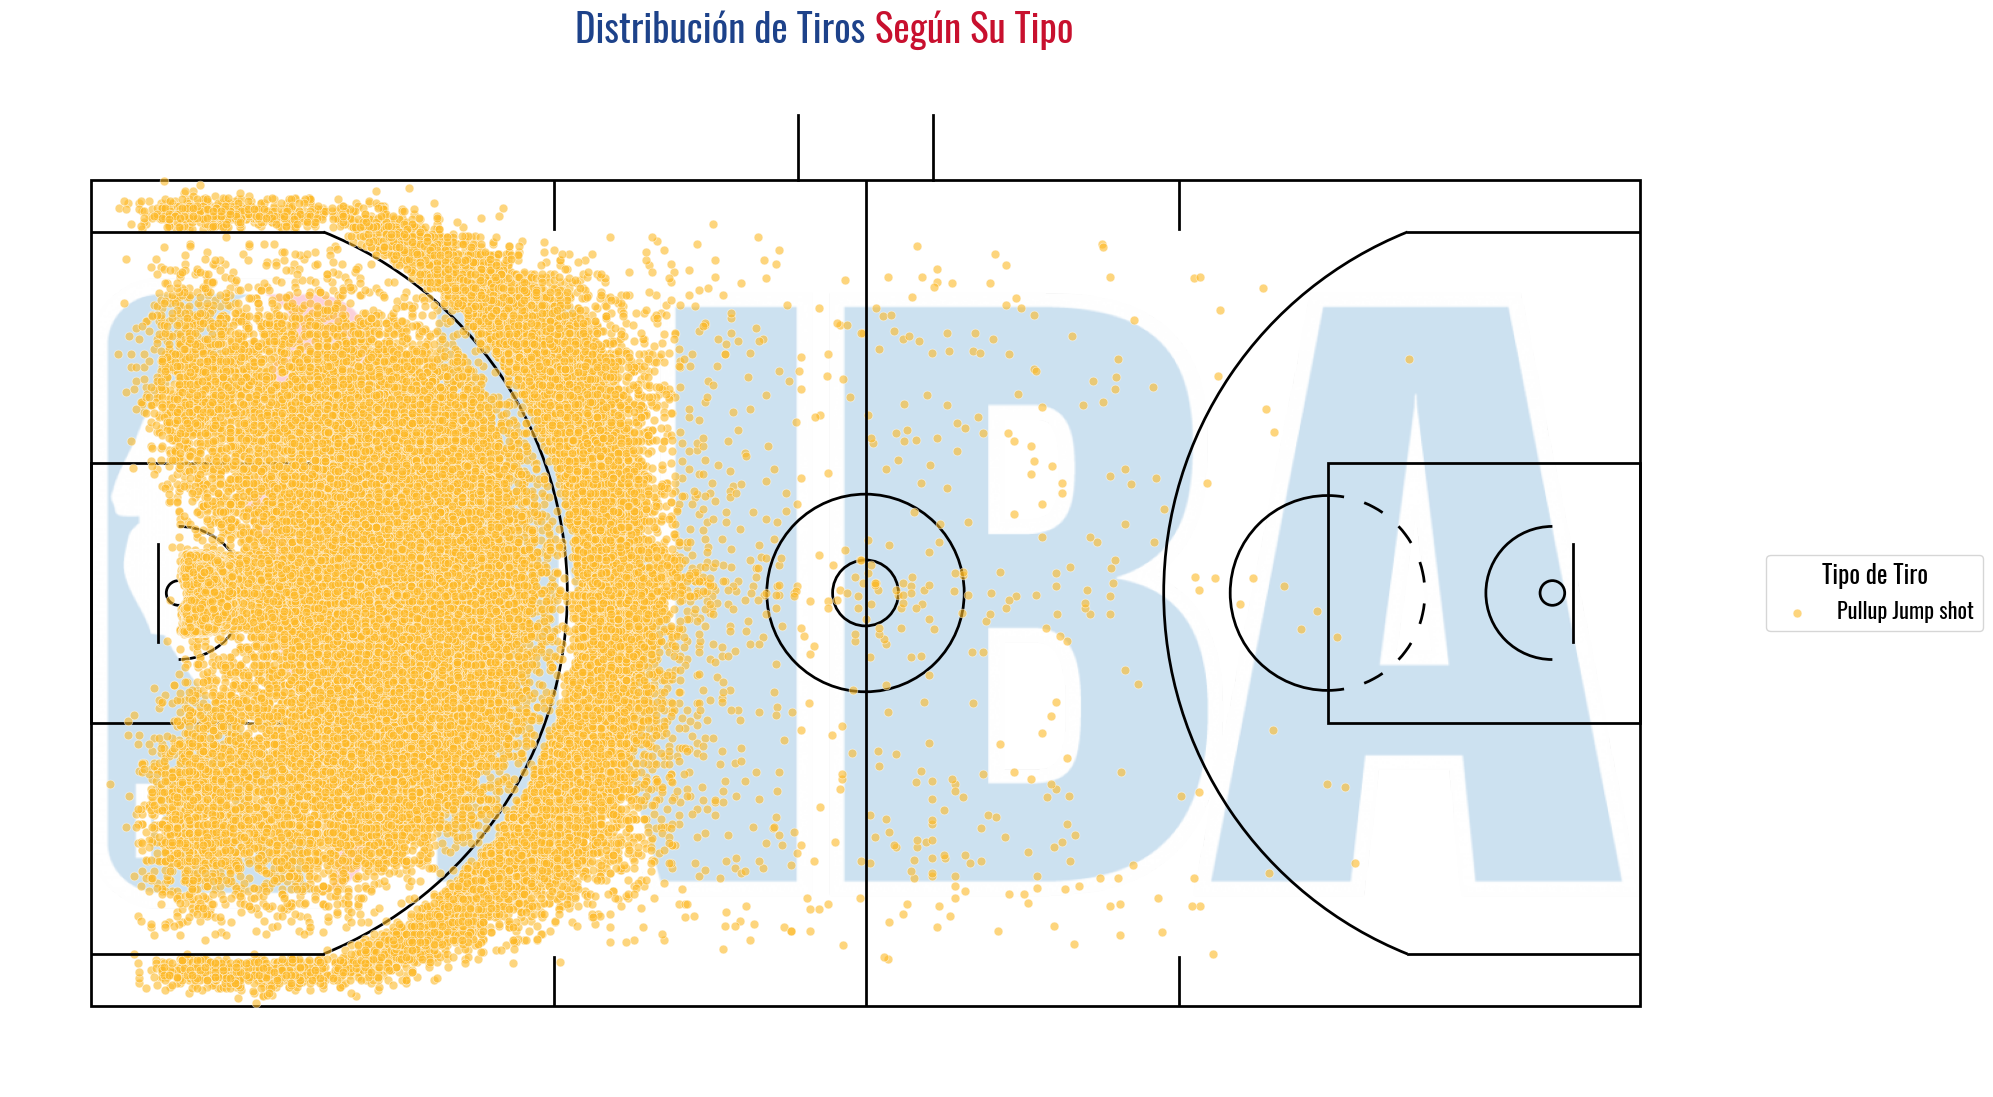

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# --- Configurar fuente personalizada ---
font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Cargar imagen de fondo (marca de agua) ---
img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

# --- Diccionario de colores por tipo de tiro ---
colores_por_tipo = {
    "Jump Shot": "#1D428A",                   # Azul (NBA / 76ers)
    "Pullup Jump shot": "#FDB927",            # Amarillo (Lakers)
    "Step Back Jump shot": "#F58426",         # Naranja (Knicks)
    "Driving Floating Jump Shot": "#A05DA5",  # Púrpura (Kings)
    "Running Layup shot": "#B8C4CA",          # Azul claro (Mavs)
    "Driving Finger Roll Layup shot": "#C4CED4",  # Gris (Spurs)
    "Layup Shot": "#000000",                  # Negro (Nets)
    "Driving Layup Shot": "#007A33",          # Verde (Celtics)
    "Cutting Layup Shot": "#C8102E",          # Rojo (Bulls)
    "Cutting Dunk Shot": "#006BB6"            # Azul fuerte (Pistons)
}


# --- Filtrar los datos por tipo de tiro ---
tipos_tiro = [

    "Pullup Jump shot"

]
df_filtrado = df[df["ACTION_TYPE"].isin(tipos_tiro)].copy()

# --- Ajustar coordenadas si es necesario ---
df_filtrado.loc[:, "LOC_Y"] = df_filtrado["LOC_Y"] - 47

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(20, 11))

# --- Dibujar la cancha ---
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax)

# --- Insertar imagen de fondo como marca de agua ---
ax.imshow(
    img_array,
    extent=[-47, 47, -25, 25],
    alpha=0.2,
    aspect='auto',
    zorder=0
)

# --- Dibujar tiros ---
for tipo in tipos_tiro:
    tiros_tipo = df_filtrado[df_filtrado["ACTION_TYPE"] == tipo]
    ax.scatter(
        tiros_tipo["LOC_Y"], tiros_tipo["LOC_X"],
        label=tipo,
        alpha=0.6,
        s=40,
        edgecolors="white",
        linewidth=0.5,

        color=colores_por_tipo.get(tipo, "gray")  # Color asignado
    )

# --- Título dividido en dos colores ---
ax.text(0.5, 1.05, "Distribución de Tiros", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.5, 1.05, " Según Su Tipo", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#C8102E',
        ha='left', va='bottom')

# --- Leyenda centrada verticalmente al lado derecho y agrandada ---
legend = ax.legend(
    title="Tipo de Tiro",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=16
)
plt.setp(legend.get_title(), fontproperties=font_prop, fontsize=18)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)
    text.set_fontsize(16)

# --- Quitar ejes y ajustar diseño ---
ax.axis("off")
plt.tight_layout()
plt.show()

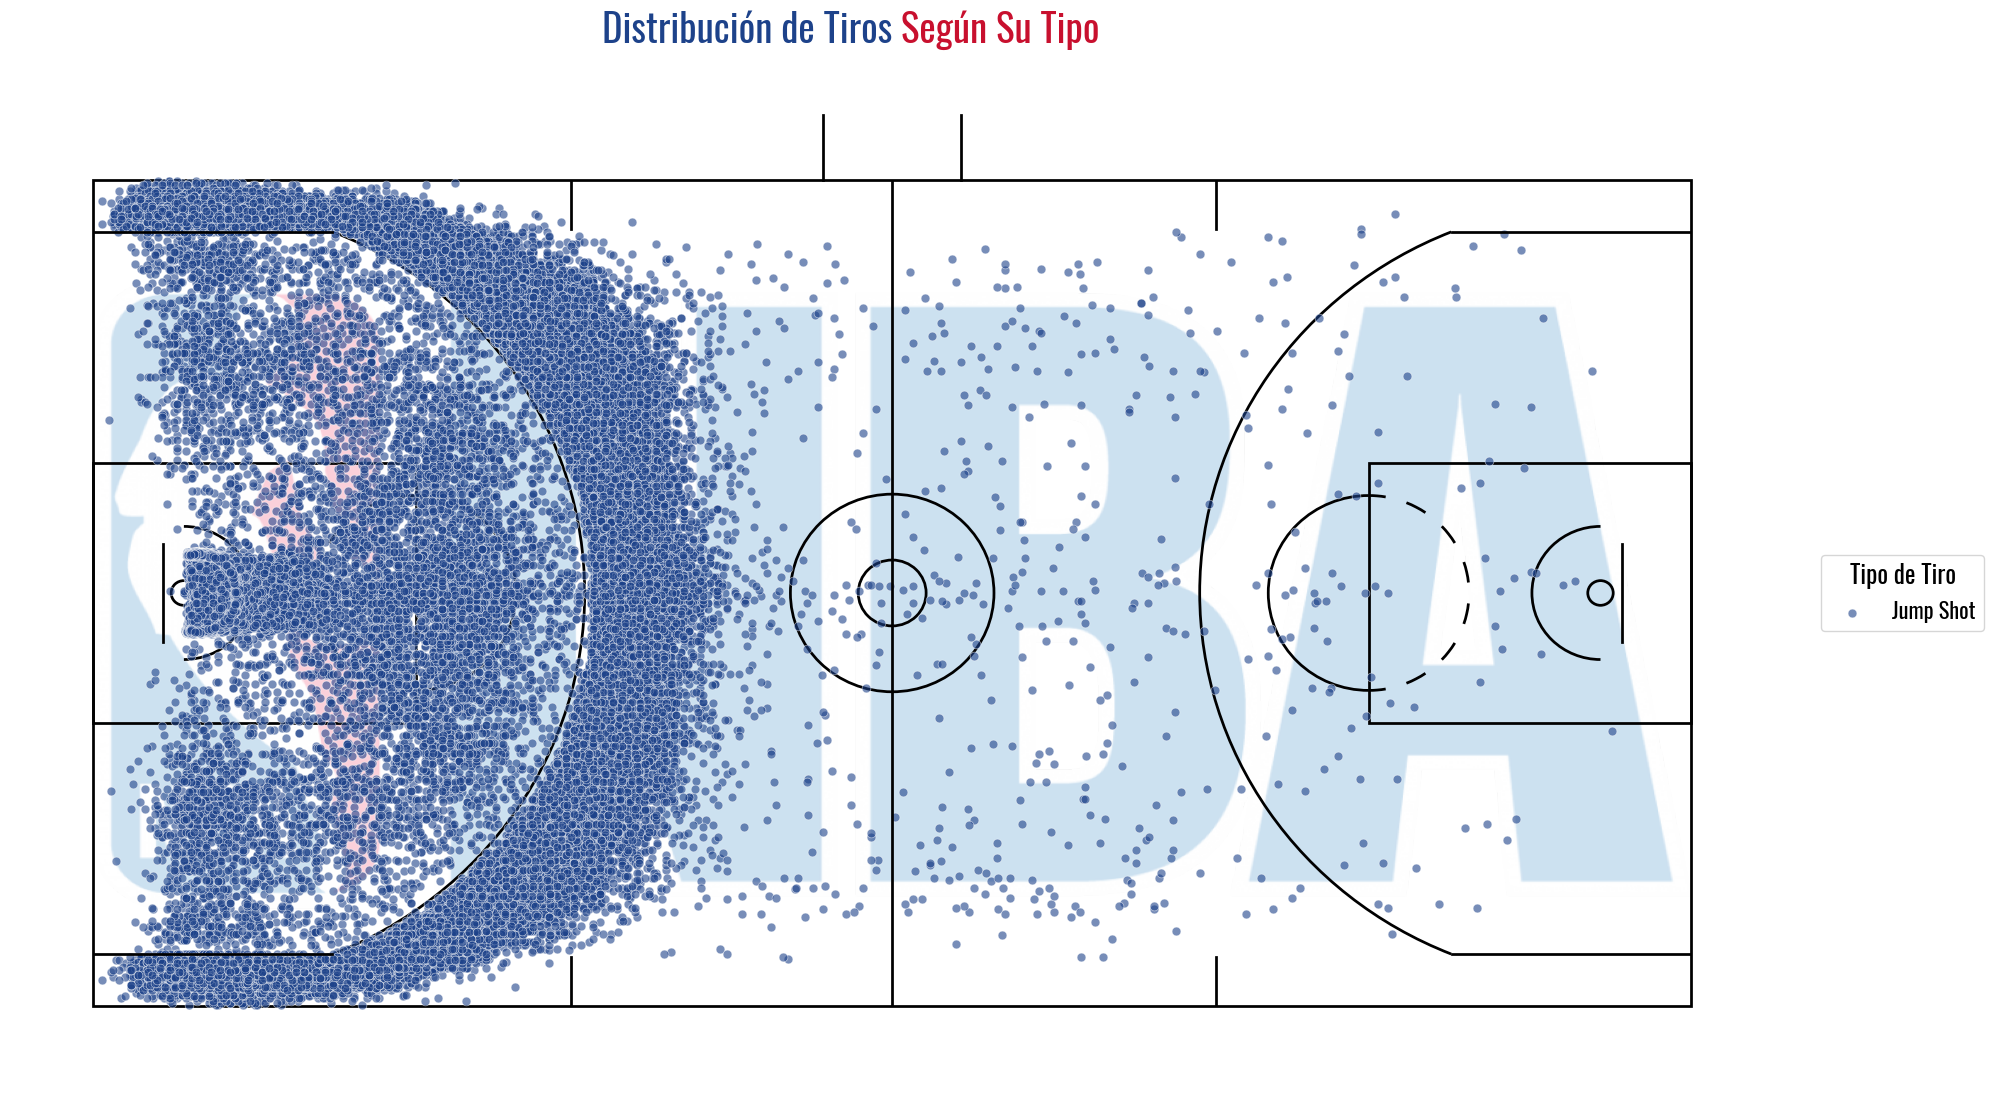

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# --- Configurar fuente personalizada ---
font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Cargar imagen de fondo (marca de agua) ---
img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

# --- Diccionario de colores por tipo de tiro ---
colores_por_tipo = {
    "Jump Shot": "#1D428A",                   # Azul (NBA / 76ers)
    "Pullup Jump shot": "#FDB927",            # Amarillo (Lakers)
    "Step Back Jump shot": "#F58426",         # Naranja (Knicks)
    "Driving Floating Jump Shot": "#A05DA5",  # Púrpura (Kings)
    "Running Layup shot": "#B8C4CA",          # Azul claro (Mavs)
    "Driving Finger Roll Layup shot": "#C4CED4",  # Gris (Spurs)
    "Layup Shot": "#000000",                  # Negro (Nets)
    "Driving Layup Shot": "#007A33",          # Verde (Celtics)
    "Cutting Layup Shot": "#C8102E",          # Rojo (Bulls)
    "Cutting Dunk Shot": "#006BB6"            # Azul fuerte (Pistons)
}


# --- Filtrar los datos por tipo de tiro ---
tipos_tiro = [
    "Jump Shot"


]
df_filtrado = df[df["ACTION_TYPE"].isin(tipos_tiro)].copy()

# --- Ajustar coordenadas si es necesario ---
df_filtrado.loc[:, "LOC_Y"] = df_filtrado["LOC_Y"] - 47

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(20, 11))

# --- Dibujar la cancha ---
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax)

# --- Insertar imagen de fondo como marca de agua ---
ax.imshow(
    img_array,
    extent=[-47, 47, -25, 25],
    alpha=0.2,
    aspect='auto',
    zorder=0
)

# --- Dibujar tiros ---
for tipo in tipos_tiro:
    tiros_tipo = df_filtrado[df_filtrado["ACTION_TYPE"] == tipo]
    ax.scatter(
        tiros_tipo["LOC_Y"], tiros_tipo["LOC_X"],
        label=tipo,
        alpha=0.6,
        s=40,
        edgecolors="white",
        linewidth=0.5,

        color=colores_por_tipo.get(tipo, "gray")  # Color asignado
    )

# --- Título dividido en dos colores ---
ax.text(0.5, 1.05, "Distribución de Tiros", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.5, 1.05, " Según Su Tipo", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#C8102E',
        ha='left', va='bottom')

# --- Leyenda centrada verticalmente al lado derecho y agrandada ---
legend = ax.legend(
    title="Tipo de Tiro",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=16
)
plt.setp(legend.get_title(), fontproperties=font_prop, fontsize=18)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)
    text.set_fontsize(16)

# --- Quitar ejes y ajustar diseño ---
ax.axis("off")
plt.tight_layout()
plt.show()

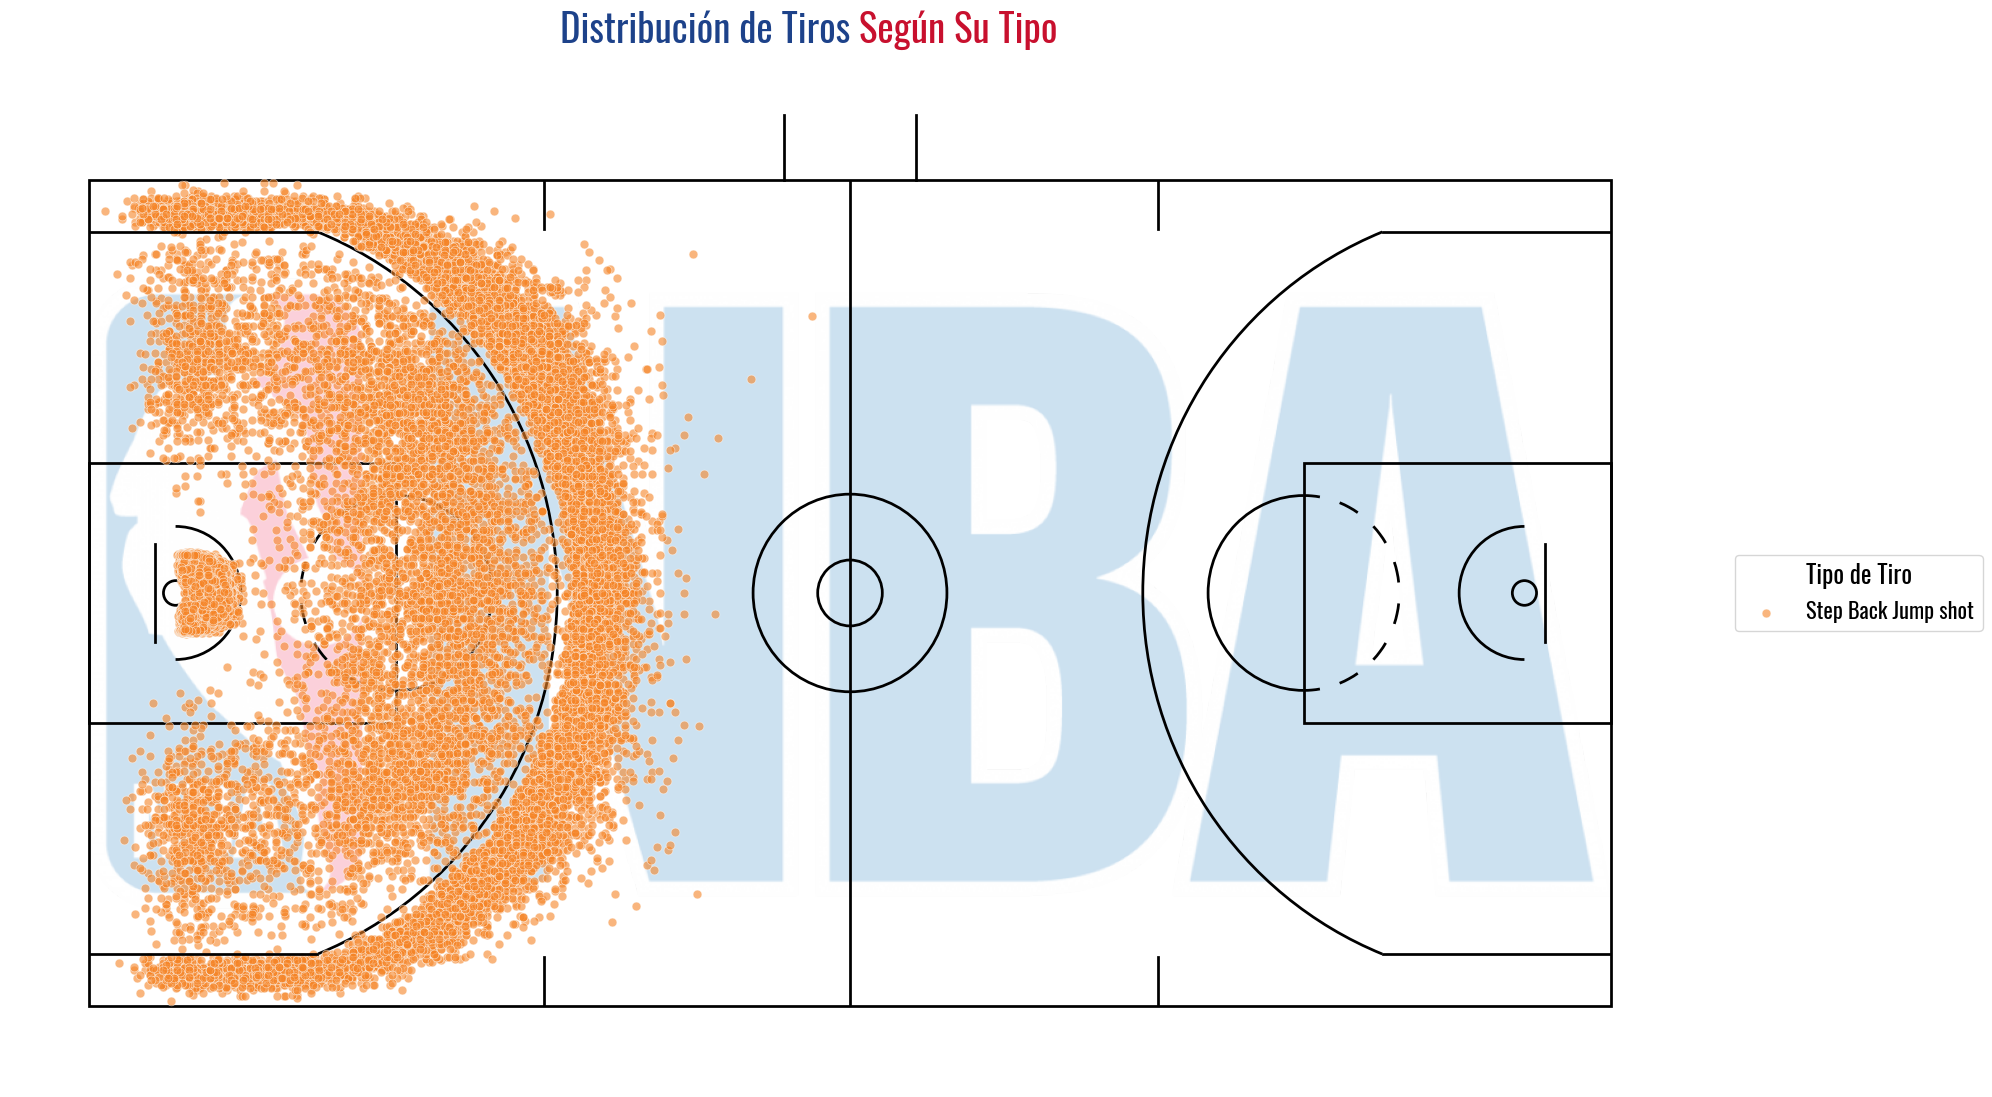

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from mplbasketball import Court
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np

# --- Configurar fuente personalizada ---
font_path = "/home/reboot-student/Downloads/Oswald/Oswald-VariableFont_wght.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Cargar imagen de fondo (marca de agua) ---
img = Image.open("/home/reboot-student/Pictures/Useful images/NBA-logo-png-download-free-1200x675.png")
img_array = np.array(img)

# --- Diccionario de colores por tipo de tiro ---
colores_por_tipo = {
    "Jump Shot": "#1D428A",                   # Azul (NBA / 76ers)
    "Pullup Jump shot": "#FDB927",            # Amarillo (Lakers)
    "Step Back Jump shot": "#F58426",         # Naranja (Knicks)
    "Driving Floating Jump Shot": "#A05DA5",  # Púrpura (Kings)
    "Running Layup shot": "#B8C4CA",          # Azul claro (Mavs)
    "Driving Finger Roll Layup shot": "#C4CED4",  # Gris (Spurs)
    "Layup Shot": "#000000",                  # Negro (Nets)
    "Driving Layup Shot": "#007A33",          # Verde (Celtics)
    "Cutting Layup Shot": "#C8102E",          # Rojo (Bulls)
    "Cutting Dunk Shot": "#006BB6"            # Azul fuerte (Pistons)
}


# --- Filtrar los datos por tipo de tiro ---
tipos_tiro = [

    "Step Back Jump shot"
    
]
df_filtrado = df[df["ACTION_TYPE"].isin(tipos_tiro)].copy()

# --- Ajustar coordenadas si es necesario ---
df_filtrado.loc[:, "LOC_Y"] = df_filtrado["LOC_Y"] - 47

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(20, 11))

# --- Dibujar la cancha ---
court = Court(court_type="nba", origin="center", units="ft")
court.draw(ax=ax)

# --- Insertar imagen de fondo como marca de agua ---
ax.imshow(
    img_array,
    extent=[-47, 47, -25, 25],
    alpha=0.2,
    aspect='auto',
    zorder=0
)

# --- Dibujar tiros ---
for tipo in tipos_tiro:
    tiros_tipo = df_filtrado[df_filtrado["ACTION_TYPE"] == tipo]
    ax.scatter(
        tiros_tipo["LOC_Y"], tiros_tipo["LOC_X"],
        label=tipo,
        alpha=0.6,
        s=40,
        edgecolors="white",
        linewidth=0.5,

        color=colores_por_tipo.get(tipo, "gray")  # Color asignado
    )

# --- Título dividido en dos colores ---
ax.text(0.5, 1.05, "Distribución de Tiros", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#1D428A',
        ha='right', va='bottom')

ax.text(0.5, 1.05, " Según Su Tipo", transform=ax.transAxes,
        fontproperties=font_prop, fontsize=28, color='#C8102E',
        ha='left', va='bottom')

# --- Leyenda centrada verticalmente al lado derecho y agrandada ---
legend = ax.legend(
    title="Tipo de Tiro",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=16
)
plt.setp(legend.get_title(), fontproperties=font_prop, fontsize=18)
for text in legend.get_texts():
    text.set_fontproperties(font_prop)
    text.set_fontsize(16)

# --- Quitar ejes y ajustar diseño ---
ax.axis("off")
plt.tight_layout()
plt.show()